In [28]:
import os, sys

import numpy as np

from keras.models import Model

from keras.layers import Input, Dense, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Embedding

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.utils import to_categorical

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
docs = []          # list of text samples
labels = []        # list of label ids
labels_Index = {}  # dictionary mapping label index to label name

PATH = os.getcwd()


In [31]:
import pandas as pd

train = pd.read_csv('train.csv',engine='python')
test = pd.read_csv('test.csv',engine='python')

In [32]:
train.isnull().sum()

categories     0
converse      32
dtype: int64

In [33]:
test.isnull().sum()

id          0
converse    4
dtype: int64

In [34]:
data_viz = train.copy()
data_viz['wordcount'] = train['converse'].apply(lambda x: len(str(x).split(" ")))
data_viz['charcount'] = train['converse'].apply(lambda x: len(str(x)))
data_viz.head()

,categories,converse,wordcount,charcount
0,QUERIES FROM PHARMACY,please to verify instructions for drugname pat...,35,228
1,NEW APPOINTMENT,lmovm for patients mother to and schd rov trac...,16,92
2,OTHERS,labtype and insurance approval other incoming ...,79,464
3,OTHERS,clinical list changes medfusion secure electro...,115,643
4,MEDICATION RELATED,wants to wean off medication work phone name d...,129,723


In [35]:
print('maximum word count', data_viz['wordcount'].max())
print('maximum char count', data_viz['charcount'].max())

maximum word count 463
maximum char count 2440


In [36]:
sizes = data_viz['categories'].value_counts()
sizes

MEDICATION RELATED                               9010
NEW APPOINTMENT                                  8907
REFILL                                           8347
OTHERS                                           6253
SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)    3018
LAB RESULTS                                      2253
PROVIDER                                         1677
QUERIES FROM PHARMACY                            1464
RESCHEDULING                                     1383
SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)       1212
PRIOR AUTHORIZATION                              1043
SYMPTOMS                                         1021
CHANGE OF PROVIDER                                811
RUNNING LATE TO APPOINTMENT                       590
CANCELLATION                                      564
QUERY ON CURRENT APPOINTMENT                      559
FOLLOW UP ON PREVIOUS REQUEST                     304
CHANGE OF HOSPITAL                                127
QUERIES FROM INSURANCE FIRM 

In [37]:
categories=data_viz['categories'].unique().tolist()
categories

['QUERIES FROM PHARMACY',
 'NEW APPOINTMENT',
 'OTHERS',
 'MEDICATION RELATED',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'REFILL',
 'PRIOR AUTHORIZATION',
 'RESCHEDULING',
 'SYMPTOMS',
 'LAB RESULTS',
 'FOLLOW UP ON PREVIOUS REQUEST',
 'PROVIDER',
 'CHANGE OF PROVIDER',
 'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)',
 'QUERY ON CURRENT APPOINTMENT',
 'RUNNING LATE TO APPOINTMENT',
 'CANCELLATION',
 'CHANGE OF PHARMACY',
 'QUERIES FROM INSURANCE FIRM',
 'JUNK',
 'CHANGE OF HOSPITAL']

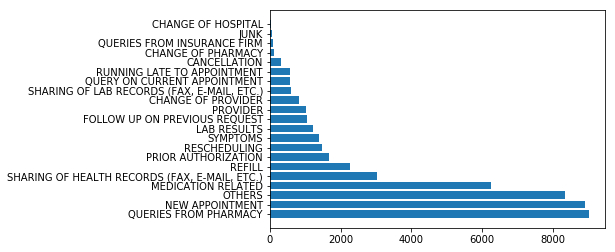

In [38]:
fig, ax = plt.subplots()
ax.barh(categories, sizes, label="categories")
plt.show()

In [39]:
docs = train.iloc[:,-1].tolist()
type(docs)

list

In [40]:
docs_test = []
docs_test = test.iloc[:,-1].tolist()
docs_test

['request to speak with rn no given patients refused to give further patients has an appointment they went to see the doctype and he recommended an anti inflammatory to help with the foot pain daughter is concerned because she does not think the pain is inflammation she thnks it is nerve pain and wants to know if doctor patients takes drugname at night but not during the day because it makes him sleepy he sleeps great at night what to do you recommend about anti inflammatory or different medication shannon bowman cma we use antiinflammatories for nerve pain as well so ok for trial if it helps great if it doesnt we can try something else virginia jethro prior authorization daughter told gingers response she will go ahead and pick up the anti infalmmatory and get him started on it they follow upwith the ortho in a few weeks to see how he is doing shannon bowman cma',
 'patients husband ret name spouse for other patients husband ret says you reach patients at timephrase am rna follow sche

In [41]:
labels = train.iloc[:,0].tolist()
labels_Index = {key:i for i, key in enumerate(list(np.unique(labels)))}
labels_Index

{'CANCELLATION': 0,
 'CHANGE OF HOSPITAL': 1,
 'CHANGE OF PHARMACY': 2,
 'CHANGE OF PROVIDER': 3,
 'FOLLOW UP ON PREVIOUS REQUEST': 4,
 'JUNK': 5,
 'LAB RESULTS': 6,
 'MEDICATION RELATED': 7,
 'NEW APPOINTMENT': 8,
 'OTHERS': 9,
 'PRIOR AUTHORIZATION': 10,
 'PROVIDER': 11,
 'QUERIES FROM INSURANCE FIRM': 12,
 'QUERIES FROM PHARMACY': 13,
 'QUERY ON CURRENT APPOINTMENT': 14,
 'REFILL': 15,
 'RESCHEDULING': 16,
 'RUNNING LATE TO APPOINTMENT': 17,
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)': 18,
 'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)': 19,
 'SYMPTOMS': 20}

In [42]:
labels = [labels_Index[i] for i in labels]
labels

[13,
 8,
 9,
 9,
 7,
 7,
 7,
 18,
 7,
 15,
 18,
 10,
 9,
 18,
 9,
 8,
 16,
 9,
 20,
 6,
 8,
 4,
 6,
 11,
 7,
 9,
 8,
 18,
 15,
 7,
 15,
 15,
 6,
 13,
 7,
 15,
 8,
 13,
 7,
 16,
 20,
 7,
 3,
 7,
 18,
 15,
 8,
 15,
 8,
 11,
 9,
 8,
 7,
 15,
 8,
 7,
 8,
 6,
 9,
 7,
 8,
 7,
 7,
 15,
 15,
 8,
 9,
 6,
 18,
 6,
 7,
 19,
 15,
 15,
 8,
 7,
 8,
 7,
 9,
 18,
 15,
 14,
 8,
 7,
 8,
 7,
 15,
 8,
 18,
 10,
 7,
 15,
 11,
 15,
 8,
 15,
 9,
 15,
 15,
 9,
 8,
 17,
 7,
 9,
 7,
 15,
 8,
 7,
 7,
 8,
 0,
 7,
 15,
 0,
 7,
 7,
 7,
 8,
 8,
 15,
 9,
 14,
 9,
 8,
 9,
 8,
 7,
 7,
 6,
 11,
 11,
 9,
 11,
 7,
 7,
 15,
 7,
 7,
 7,
 8,
 15,
 15,
 13,
 9,
 7,
 10,
 8,
 15,
 18,
 8,
 19,
 7,
 18,
 4,
 8,
 8,
 13,
 9,
 11,
 18,
 8,
 15,
 6,
 11,
 9,
 14,
 8,
 16,
 15,
 7,
 8,
 15,
 6,
 9,
 11,
 19,
 3,
 17,
 8,
 16,
 6,
 7,
 16,
 18,
 4,
 16,
 6,
 7,
 20,
 15,
 7,
 7,
 10,
 6,
 10,
 9,
 7,
 15,
 8,
 8,
 9,
 18,
 17,
 11,
 9,
 15,
 9,
 7,
 8,
 6,
 19,
 15,
 7,
 8,
 20,
 15,
 2,
 7,
 8,
 16,
 16,
 15,
 6,
 8,
 7,
 9,
 6,
 7

In [43]:
docs = [str(i) for i in docs]
docs[0]

'please to verify instructions for drugname patients wi from pharmacy target reason for call details please to verify instructions for drugname patients will be picking up Rx timephrase clarified Rx with pharmacy lisa gilligan rn'

In [44]:
docs_test = [str(i) for i in docs_test]
docs_test[0]

'request to speak with rn no given patients refused to give further patients has an appointment they went to see the doctype and he recommended an anti inflammatory to help with the foot pain daughter is concerned because she does not think the pain is inflammation she thnks it is nerve pain and wants to know if doctor patients takes drugname at night but not during the day because it makes him sleepy he sleeps great at night what to do you recommend about anti inflammatory or different medication shannon bowman cma we use antiinflammatories for nerve pain as well so ok for trial if it helps great if it doesnt we can try something else virginia jethro prior authorization daughter told gingers response she will go ahead and pick up the anti infalmmatory and get him started on it they follow upwith the ortho in a few weeks to see how he is doing shannon bowman cma'

In [45]:
# Prepare tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs)

word_Index = tokenizer.word_index

vocab_Size = len(word_Index) + 1
print('Found %s unique tokens.' % vocab_Size)

Found 35748 unique tokens.


In [46]:
word_Index

{'to': 1,
 'patients': 2,
 'and': 3,
 'the': 4,
 'for': 5,
 'she': 6,
 'of': 7,
 'patient': 8,
 'timephrase': 9,
 'is': 10,
 'a': 11,
 'mg': 12,
 'on': 13,
 'rn': 14,
 'drugname': 15,
 'with': 16,
 'in': 17,
 'that': 18,
 'her': 19,
 'please': 20,
 'rx': 21,
 'rna': 22,
 'labtype': 23,
 'by': 24,
 'pm': 25,
 'follow': 26,
 'am': 27,
 'appointment': 28,
 'at': 29,
 'po': 30,
 'was': 31,
 'mom': 32,
 'tabs': 33,
 'he': 34,
 'not': 35,
 'will': 36,
 'other': 37,
 'has': 38,
 'from': 39,
 'if': 40,
 'i': 41,
 'this': 42,
 'be': 43,
 'md': 44,
 'clinical': 45,
 'doctor': 46,
 'have': 47,
 'list': 48,
 'changes': 49,
 'x': 50,
 'would': 51,
 'name': 52,
 'phone': 53,
 'it': 54,
 'message': 55,
 'pharmacy': 56,
 'authorized': 57,
 'entered': 58,
 'medication': 59,
 'prescription': 60,
 'states': 61,
 'you': 62,
 'like': 63,
 'can': 64,
 'refill': 65,
 'completed': 66,
 'advise': 67,
 'but': 68,
 'then': 69,
 'fax': 70,
 'new': 71,
 'back': 72,
 'up': 73,
 'or': 74,
 'schedule': 75,
 'as': 76,

In [47]:
# integer encode the documents
sequences = tokenizer.texts_to_sequences(docs)
print(docs[1], sequences[1])

for i in sequences:
    print (len(i))

lmovm for patients mother to and schd rov tracy dominguez am kellee currie pm rhonda fanning [661, 5, 2, 518, 1, 3, 574, 106, 695, 815, 27, 380, 418, 25, 387, 2461]
35
16
79
115
129
152
52
30
89
131
60
163
65
49
22
26
125
81
217
148
73
135
57
109
129
14
12
79
156
57
53
106
50
32
30
131
18
140
137
47
70
162
143
200
39
74
156
121
7
42
24
6
133
109
31
130
5
151
73
107
26
167
138
73
107
21
83
101
95
35
152
43
119
111
16
162
125
105
46
98
166
115
3
175
126
183
113
5
102
41
49
42
117
161
34
134
50
171
94
74
148
14
92
103
113
160
17
103
87
58
19
145
148
51
162
140
29
50
150
43
16
39
18
5
39
15
155
51
154
66
135
121
116
186
167
182
145
213
136
42
55
77
52
28
199
45
4
111
63
136
81
211
67
105
9
68
41
85
73
80
21
122
96
44
3
143
59
197
70
202
16
120
167
68
84
161
193
79
4
48
27
209
17
45
175
20
98
79
174
94
202
122
57
106
60
191
112
103
16
144
70
39
11
84
43
129
114
148
15
148
20
101
163
17
127
158
108
32
17
52
64
132
76
134
213
122
165
171
130
12
154
19
78
21
30
27
126
26
41
57
58
195
85
23
119

44
116
23
121
30
151
18
18
146
65
6
31
112
190
78
153
106
85
6
64
72
151
46
80
119
108
112
162
24
103
197
88
141
40
33
65
209
99
193
101
151
26
131
128
54
92
86
62
98
86
113
100
53
15
38
148
179
41
64
91
211
85
103
206
28
141
77
30
125
21
24
43
15
102
53
122
81
100
113
86
120
92
18
78
17
80
86
166
211
35
19
21
14
43
127
177
110
91
186
143
85
157
204
129
52
185
95
28
109
71
167
166
65
30
8
144
39
109
170
121
126
114
43
166
45
165
21
36
39
86
101
105
114
198
56
15
85
88
188
21
104
70
127
86
159
90
109
95
32
70
122
5
44
118
22
11
31
45
87
83
31
40
24
60
91
16
42
53
27
113
44
68
101
96
71
140
59
51
99
29
38
33
133
75
4
214
127
54
93
121
30
124
113
54
106
20
113
184
130
16
49
18
33
88
11
102
117
26
44
57
63
94
19
103
113
57
54
66
147
45
89
77
162
81
63
50
8
18
128
97
167
125
57
39
63
45
63
55
59
75
25
160
13
64
38
74
27
92
10
63
84
20
93
185
167
68
96
68
49
29
21
24
30
50
150
133
22
156
224
35
152
153
8
3
24
164
88
103
70
50
64
40
111
88
155
43
119
58
185
164
124
101
181
51
157
116
70
178
9

28
54
151
152
101
39
45
39
64
108
88
35
18
28
45
23
51
98
31
183
89
7
36
99
81
161
126
35
66
4
84
56
100
9
54
149
119
57
149
28
108
95
17
12
56
77
18
143
84
24
8
69
19
110
57
112
21
81
111
35
120
43
40
148
16
121
13
213
112
85
197
185
23
176
26
64
118
140
42
12
73
120
23
179
153
43
149
43
77
168
90
31
72
96
108
71
62
156
83
51
60
104
76
86
65
41
88
145
188
97
15
8
124
50
133
39
102
174
26
155
53
44
44
126
100
95
105
136
98
75
83
81
41
22
35
169
147
74
111
122
74
162
120
7
158
76
92
23
213
36
62
82
101
112
16
55
33
102
25
23
81
26
127
106
38
156
10
20
121
143
128
134
6
140
20
12
106
24
201
7
114
69
1
147
159
100
44
40
114
118
1
172
75
26
38
60
119
96
158
175
126
9
123
146
79
58
19
42
168
51
21
72
159
42
137
59
43
87
39
20
146
9
35
149
43
144
33
100
75
4
17
140
30
40
115
83
126
45
15
126
90
17
71
36
43
17
4
64
132
27
63
158
134
35
26
62
7
48
48
85
33
141
29
26
102
102
5
70
54
8
57
73
129
134
5
90
172
20
93
46
194
194
29
155
168
119
62
89
145
145
6
20
62
26
30
127
191
220
78
164
45
107
21

143
69
128
133
80
68
77
117
68
101
60
80
83
20
97
42
63
49
37
21
55
43
107
38
120
29
50
111
47
14
4
138
18
70
60
9
104
126
7
40
185
42
180
77
4
123
26
33
126
152
43
42
94
74
152
145
173
170
18
50
3
36
45
151
62
134
10
48
135
164
6
158
151
148
22
94
55
56
126
96
138
57
17
135
51
119
58
90
72
22
89
174
58
6
151
99
160
91
43
35
79
136
32
63
70
32
101
84
44
38
158
59
176
78
78
129
126
26
9
186
42
23
68
207
197
13
159
46
134
24
122
169
53
115
66
3
125
124
171
187
92
127
83
94
30
145
168
157
65
84
79
24
57
46
167
119
35
76
34
3
94
28
144
18
67
144
139
4
63
101
3
171
90
134
117
77
9
144
86
162
29
27
58
67
53
179
190
85
69
37
32
65
148
109
55
157
8
59
196
16
67
91
32
45
198
89
104
191
102
115
66
45
141
36
26
174
98
46
213
207
52
21
87
36
83
40
158
58
4
144
22
107
182
167
31
201
42
91
116
116
75
7
48
148
98
165
31
144
32
81
85
5
71
29
169
148
110
15
125
126
26
53
125
32
207
97
163
100
111
7
61
170
28
181
36
31
35
73
65
121
40
216
44
100
74
55
108
6
97
31
128
57
106
4
4
126
100
16
104
97
84
150


26
15
38
153
72
42
29
37
35
58
105
113
137
123
181
3
69
60
62
49
189
78
28
130
21
78
62
79
23
38
15
125
27
46
147
64
70
133
56
152
25
121
36
40
115
46
51
28
42
110
90
86
87
129
59
186
134
45
87
83
118
73
54
151
110
25
83
107
228
81
49
104
39
95
118
18
96
23
60
66
163
98
63
20
71
102
59
23
24
12
143
140
55
108
80
150
77
92
39
64
221
175
62
159
5
7
176
209
98
55
54
87
41
38
66
47
54
5
65
140
151
39
53
55
26
54
147
21
48
108
31
169
95
4
39
19
112
76
124
51
151
73
85
62
67
37
17
128
13
64
52
37
44
40
48
141
47
108
39
55
52
189
45
58
66
101
43
91
50
90
14
20
162
53
38
109
53
56
169
17
4
106
42
96
15
28
19
162
237
95
64
30
101
174
56
13
15
140
7
27
30
98
180
5
65
146
20
26
24
79
6
26
84
13
36
143
106
25
73
101
8
33
47
170
159
41
54
124
152
91
201
98
55
102
37
39
23
203
76
42
176
93
44
82
197
74
35
123
59
122
49
57
135
20
48
148
149
53
101
52
25
55
91
13
82
61
61
66
56
56
196
27
20
155
166
162
56
42
34
4
165
40
74
123
6
60
158
19
55
146
126
3
175
34
80
107
128
220
103
40
122
170
100
124
156
8

15
58
83
65
127
138
16
108
68
54
21
61
124
74
51
131
176
51
7
98
113
129
48
3
139
20
84
103
156
103
4
216
72
105
15
33
52
4
55
27
27
112
4
90
34
65
21
82
116
38
86
126
64
126
32
32
172
194
31
183
131
114
26
116
84
127
120
54
59
115
101
53
47
42
137
80
71
133
54
141
106
47
179
34
61
86
11
42
18
80
34
48
43
54
116
31
156
110
152
40
75
86
151
72
38
101
124
126
39
57
83
15
156
84
174
18
28
13
138
156
78
101
74
72
15
171
59
41
71
37
138
87
162
120
137
187
13
71
117
106
128
105
149
26
27
127
82
26
25
10
80
184
104
17
167
35
198
48
88
187
35
72
125
91
53
53
80
42
127
149
55
98
143
155
203
180
5
41
170
126
26
36
41
126
85
21
9
71
196
29
120
73
178
80
105
180
141
68
20
15
112
7
60
34
33
105
65
63
41
100
30
63
37
22
73
36
82
34
63
48
155
42
188
192
177
42
125
65
100
74
149
141
199
112
41
99
23
45
105
73
92
51
84
46
34
157
92
85
106
36
27
115
59
20
102
178
39
54
134
159
122
49
117
22
110
79
49
102
5
71
49
98
71
92
150
20
145
101
80
10
16
180
15
50
33
117
18
8
8
98
67
193
74
29
71
42
40
43
125
44


74
113
52
198
62
138
47
40
97
147
43
161
112
77
81
47
18
69
104
104
39
97
55
24
20
54
146
25
35
54
61
147
20
53
79
218
66
174
24
151
53
271
6
31
104
7
29
55
141
94
91
53
155
168
61
103
24
191
80
58
126
153
5
154
45
19
34
82
85
122
140
105
43
168
25
122
67
28
59
143
103
19
161
142
50
75
152
54
95
95
20
109
209
71
99
202
37
7
53
31
113
116
59
143
80
72
52
13
103
121
77
114
151
5
9
46
32
29
67
101
134
146
30
50
141
145
29
98
74
158
19
66
134
23
75
72
139
44
96
116
19
65
12
146
49
49
17
128
6
36
162
55
137
80
41
41
12
26
16
126
145
195
54
20
112
15
108
111
156
95
70
28
65
72
144
62
67
150
18
53
63
89
54
78
149
25
47
36
242
66
137
51
154
6
74
179
118
26
130
154
174
76
31
56
54
144
123
155
97
57
105
127
46
213
106
14
38
185
77
56
133
156
84
132
94
110
99
34
120
86
17
178
4
65
72
112
110
126
4
151
25
113
85
129
129
109
151
59
30
71
43
60
77
73
123
149
77
95
151
116
18
4
117
122
189
123
67
70
50
79
50
93
60
68
155
34
48
13
100
121
113
192
78
15
101
100
46
23
57
102
28
154
16
159
161
22
146
134

8
140
93
41
34
81
50
43
26
76
148
60
27
75
43
148
61
126
23
131
150
106
94
69
165
76
227
83
130
81
35
15
152
126
151
132
31
87
53
133
14
27
39
11
128
41
125
44
91
135
109
135
138
8
80
30
31
64
6
36
58
32
54
131
7
77
32
97
70
158
83
94
160
113
52
39
127
53
89
151
61
37
64
31
89
53
16
111
72
128
16
55
57
96
33
121
10
56
76
124
88
53
63
161
57
14
147
24
100
46
125
67
38
76
42
181
16
5
175
63
94
136
181
186
49
16
65
24
15
103
89
101
87
70
108
35
41
7
106
195
45
46
163
121
95
126
205
185
17
134
180
27
140
69
127
77
114
134
80
136
113
131
113
94
100
101
21
152
190
67
162
62
170
65
51
92
138
65
5
115
209
97
18
169
23
82
75
160
154
49
138
191
52
36
165
7
39
69
71
46
134
147
89
117
7
30
163
33
153
135
144
122
94
91
133
105
48
95
86
76
75
54
6
156
31
59
44
27
70
27
162
65
1
128
76
64
75
20
166
36
13
53
124
137
199
47
136
147
120
15
46
143
41
104
134
74
79
103
27
170
136
19
46
173
22
47
87
136
114
193
75
41
156
4
48
62
36
109
119
76
14
150
67
65
142
143
113
199
125
209
117
52
70
14
64
27
34
88
23

52
59
164
22
116
4
116
49
142
65
19
34
62
52
47
101
3
111
101
61
175
150
184
65
45
77
41
112
100
29
39
111
38
9
133
20
32
123
127
18
10
97
22
129
40
62
105
110
19
121
117
109
61
44
152
130
22
126
31
60
107
33
70
83
201
193
43
134
69
54
89
109
124
103
20
188
67
101
40
148
134
50
94
75
129
78
65
23
8
44
5
172
77
185
53
21
14
108
44
41
150
119
126
151
89
170
98
77
187
57
40
132
89
16
38
117
15
40
19
91
43
118
88
13
57
161
15
173
68
166
144
91
59
38
114
154
15
57
12
116
39
88
135
42
94
26
108
31
116
209
126
12
175
223
38
122
50
120
66
103
124
88
145
27
89
156
15
48
68
211
154
111
3
42
68
139
50
160
58
45
26
44
44
138
200
87
209
130
65
119
71
143
42
39
126
31
7
51
192
138
61
101
2
78
120
23
191
123
17
82
19
65
173
92
39
78
165
179
26
180
17
35
65
43
39
164
27
47
98
73
131
28
56
57
153
88
96
186
58
145
189
76
76
21
105
29
59
78
8
37
8
50
50
31
41
29
39
18
85
8
59
177
39
50
89
111
53
27
154
91
98
11
126
84
107
125
129
94
52
28
117
63
83
128
110
61
189
150
20
185
122
110
10
76
82
23
150
14
159

54
60
7
90
98
214
169
43
138
121
61
24
81
110
4
8
35
95
157
15
69
33
67
118
100
54
33
20
85
75
149
32
98
144
33
32
46
140
38
141
12
73
89
32
46
16
85
108
71
78
121
105
57
38
35
149
8
101
100
30
183
105
69
127
69
180
80
183
30
6
6
42
137
83
165
146
43
66
39
135
65
83
220
67
144
58
45
79
39
40
115
17
142
54
148
77
49
50
60
17
101
119
157
62
86
19
116
167
32
60
35
28
39
44
155
70
84
18
97
36
188
134
119
113
33
208
35
67
49
88
22
186
6
130
101
114
138
149
6
50
122
155
159
168
38
20
11
124
41
49
31
129
26
129
63
13
58
35
47
28
90
15
135
36
111
115
78
42
45
67
176
163
21
145
89
6
29
80
158
70
127
138
146
70
82
69
149
94
30
216
46
115
84
62
124
63
54
166
38
50
47
78
44
82
56
115
61
78
142
99
178
22
236
60
39
126
149
2
32
123
83
112
185
45
131
39
46
18
74
96
32
44
103
69
61
26
102
3
64
28
89
4
17
52
120
168
23
157
72
65
26
139
123
111
129
7
84
81
72
158
103
78
12
51
143
201
135
113
81
60
62
103
209
73
73
46
74
97
143
28
57
47
47
14
104
55
69
17
83
91
139
38
43
84
143
93
5
103
221
108
189
88
13

58
39
78
79
28
125
63
170
80
48
96
64
56
59
29
131
17
172
68
157
47
64
87
164
12
118
20
84
107
77
64
21
63
98
31
156
35
93
7
80
108
90
148
39
38
45
26
97
158
29
43
100
55
20
19
105
10
123
29
50
43
80
142
134
67
36
23
28
86
79
23
82
123
45
21
156
4
157
114
76
83
28
100
154
70
94
120
124
31
77
187
54
179
72
93
3
78
45
53
160
48
32
114
17
58
113
141
64
158
25
79
42
168
21
19
57
17
45
50
105
102
138
8
76
14
115
84
32
48
131
121
17
83
152
47
64
63
122
19
125
59
27
51
46
48
25
51
20
27
73
19
41
149
137
130
17
24
68
102
35
64
72
47
72
45
144
60
138
94
113
104
58
134
132
34
7
39
51
38
25
82
70
30
68
94
106
85
6
22
2
20
58
151
53
32
26
63
161
34
160
77
26
17
69
70
53
46
56
43
20
95
76
219
46
163
10
207
70
86
23
8
88
137
39
176
32
98
131
79
162
159
134
161
115
66
41
107
205
69
112
81
55
42
85
83
147
17
70
142
65
80
30
96
158
82
159
112
19
160
119
23
82
123
71
194
49
126
77
38
90
132
63
107
198
172
192
45
97
90
58
45
3
29
125
97
156
30
110
53
8
110
93
130
97
161
40
61
71
90
178
38
71
18
60
80
114

141
127
24
51
93
173
132
119
30
119
53
111
67
53
49
8
178
131
103
156
45
204
52
261
146
30
93
119
3
71
93
60
147
28
204
26
180
42
146
139
75
18
63
153
7
124
153
66
56
128
54
19
123
101
179
94
56
27
75
129
7
56
149
103
17
50
44
91
20
122
50
6
50
16
214
86
108
82
81
8
183
26
46
79
23
54
127
105
86
143
32
97
89
32
54
5
97
53
26
6
109
121
53
72
127
89
3
127
128
111
171
103
215
26
25
46
137
63
28
21
130
171
37
11
30
45
32
42
164
48
79
91
132
61
25
174
130
19
33
34
136
27
66
140
85
7
50
70
76
69
1
169
171
135
171
142
86
111
30
11
113
168
188
124
165
205
155
147
104
95
28
25
181
162
35
42
50
11
67
83
39
195
147
117
146
38
18
7
90
57
21
71
139
171
81
36
134
123
8
17
63
86
70
92
146
29
208
45
35
38
22
90
6
36
21
196
67
62
88
38
62
103
115
37
110
36
29
60
45
6
50
31
110
178
133
26
120
139
49
120
24
25
164
80
81
92
53
93
54
94
109
70
52
87
6
46
67
97
95
206
67
77
132
161
94
138
166
105
39
56
47
52
41
58
94
20
22
107
102
94
111
18
48
65
76
96
96
45
150
23
100
24
129
122
17
47
102
171
109
137
144
1

94
50
83
78
33
14
152
19
98
63
49
99
169
62
59
6
25
115
56
41
60
34
64
112
165
80
73
162
197
99
22
57
93
55
23
180
95
32
83
122
124
13
45
160
26
174
138
174
118
124
17
149
80
29
61
83
100
39
49
82
55
158
7
61
61
86
42
5
70
36
16
126
78
7
22
80
15
31
162
88
186
37
43
174
73
57
125
175
173
100
67
71
107
51
88
132
2
92
8
34
146
174
177
123
206
99
95
177
58
169
41
92
150
51
157
63
96
61
78
15
177
31
36
43
48
80
126
147
74
145
83
102
51
88
9
38
81
192
72
85
111
190
77
97
25
8
45
82
44
93
104
80
38
57
67
109
199
79
95
98
168
103
90
76
40
56
41
63
110
27
52
76
27
53
9
176
63
138
25
32
110
38
92
158
43
37
122
16
89
7
107
101
160
64
102
166
137
16
45
30
11
93
107
5
15
60
25
154
18
140
33
99
48
78
21
125
122
103
211
3
4
64
55
143
72
158
82
52
37
36
57
95
197
101
59
7
44
148
57
40
56
99
76
128
103
158
100
69
138
175
78
147
8
54
35
6
53
128
157
132
118
96
60
15
121
91
33
62
144
17
6
21
69
43
32
55
178
101
62
72
18
86
34
168
108
9
146
42
133
153
27
82
21
5
27
134
45
17
68
150
25
34
37
94
44
87
47
3

191
197
154
74
100
8
67
103
31
76
202
53
223
99
118
86
54
5
121
82
178
105
29
139
103
87
123
157
77
32
30
135
50
21
29
156
190
19
84
20
198
114
57
47
127
52
141
188
54
22
87
24
13
68
36
82
69
91
28
169
96
63
153
165
49
7
166
66
130
107
116
147
33
42
102
91
174
62
66
138
119
59
58
160
20
111
117
109
101
119
67
9
96
143
145
191
51
71
70
73
75
15
36
60
54
138
195
59
41
19
91
207
32
155
19
62
44
29
126
43
99
31
92
31
52
52
65
82
177
25
3
154
132
60
119
18
103
45
57
41
77
109
70
36
5
139
88
40
5
14
6
167
51
199
49
140
66
66
43
143
24
83
46
48
51
97
73
132
71
104
58
28
67
89
84
136
127
85
55
51
1
47
117
61
50
101
141
4
31
60
80
82
97
22
204
60
18
24
173
84
91
110
73
107
102
40
105
190
49
35
8
57
5
143
190
26
67
188
38
61
77
88
53
13
166
7
148
166
129
161
31
50
22
42
29
111
3
151
101
112
113
172
116
86
55
52
94
118
173
37
82
168
15
27
54
16
41
154
160
106
121
155
49
22
42
123
125
123
45
94
63
123
27
51
82
164
142
32
17
114
123
166
103
155
157
151
50
76
174
177
52
132
40
53
106
77
149
40
181
2

39
186
31
41
139
10
120
81
95
177
44
84
5
67
66
49
123
69
95
41
93
49
16
64
123
87
103
39
126
85
37
150
30
27
155
21
53
8
130
112
80
14
180
23
83
29
79
91
22
190
56
124
23
124
33
37
96
109
50
24
28
29
4
219
119
16
31
5
96
23
38
13
42
140
109
115
91
79
5
54
85
13
139
71
100
97
118
148
114
56
134
171
103
128
110
52
155
20
140
117
110
152
60
88
39
63
110
85
100
36
63
109
47
77
31
151
123
17
120
45
95
109
18
102
91
27
50
203
59
26
43
33
79
18
55
112
56
59
20
100
77
134
48
145
60
171
30
48
177
28
77
28
99
66
107
91
36
20
50
58
100
44
58
85
100
10
33
125
152
45
4
125
134
62
37
42
10
31
120
22
80
10
138
119
24
26
124
132
96
56
110
78
35
65
32
51
150
81
75
108
125
181
104
169
135
5
39
23
85
191
156
63
26
178
67
146
17
96
162
81
76
132
99
167
72
43
126
137
36
59
27
120
100
176
70
94
99
46
72
84
57
39
14
49
101
188
6
55
43
132
140
82
165
69
101
73
159
157
78
91
144
41
85
125
100
174
67
64
39
80
119
164
42
36
34
57
52
12
154
190
38
92
102
7
183
127
133
58
34
140
46
44
142
133
85
36
67
82
2
90
160

80
32
66
90
22
141
96
106
138
12
60
26
50
52
111
155
89
76
27
33
130
81
84
108
34
117
31
76
96
18
8
51
108
25
116
100
53
48
49
44
127
63
30
171
18
53
60
115
241
7
46
48
32
22
142
152
207
99
209
38
22
41
44
33
138
3
33
13
252
71
41
61
38
114
19
114
69
212
37
108
41
76
55
83
99
169
32
116
95
88
157
126
59
18
136
84
95
67
142
49
88
35
119
155
49
123
191
136
139
50
24
57
8
21
75
119
46
110
72
64
70
68
28
54
146
162
20
196
81
42
143
189
54
48
173
159
72
71
63
228
21
163
10
119
132
177
45
60
30
99
131
86
82
87
156
101
62
152
176
12
207
136
30
87
46
39
21
159
81
88
130
6
154
110
38
145
169
129
45
45
123
14
49
44
65
32
69
9
38
196
56
140
32
31
58
61
35
21
46
30
94
64
23
170
130
95
90
114
43
123
150
82
24
74
137
142
51
124
31
182
3
116
70
20
4
32
24
60
57
146
9
141
48
55
62
174
30
39
226
165
31
90
83
4
29
164
126
85
39
102
145
107
112
117
123
119
43
32
172
92
32
154
54
80
35
9
109
137
43
155
13
68
59
7
159
66
69
118
18
34
15
90
209
22
83
70
74
68
29
50
25
9
217
143
102
67
75
49
99
18
41
86
112


In [48]:
sequences_test = tokenizer.texts_to_sequences(docs_test)
print(docs_test[1], sequences_test[1])

patients husband ret name spouse for other patients husband ret says you reach patients at timephrase am rna follow scheduled timephrase am [2, 563, 1029, 52, 210, 5, 37, 2, 563, 1029, 129, 62, 754, 2, 29, 9, 27, 22, 26, 107, 9, 27]


In [49]:
MAX_SEQUENCE_LENGTH = 1000

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of data tensor:', data.shape)

Shape of data tensor: (48699, 1000)


In [50]:
data_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of data_test tensor:', data_test.shape)

Shape of data_test tensor: (8581, 1000)


In [51]:
# split the data into a training set and a test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=2)

In [52]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [53]:
Y_train[20000]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

##### Preparing the Embedding layer

Compute an index mapping words to known embeddings, by parsing the data dump of pre-trained embeddings:

In [54]:
embeddings_index = {}
f = open(os.path.join(PATH, 'glove.6B.50d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [55]:
embedding_Matrix = np.zeros((vocab_Size, 50))
for word, i in word_Index.items():
    embedding_Vector = embeddings_index.get(word)
    if embedding_Vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_Matrix[i] = embedding_Vector

print (embedding_Matrix.shape)

(35748, 50)


In [56]:
embedding_layer = Embedding(vocab_Size,
                            50,
                            weights=[embedding_Matrix],
                            input_length=MAX_SEQUENCE_LENGTH)

Finally build a small 1D convnet to solve our classification problem:

In [20]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(64, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(4)(x)
x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(4)(x)
x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(4)(x)  
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
preds = Dense(len(labels_Index), activation='softmax')(x)

model = Model(sequence_input, preds)

In [55]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [56]:
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 50)          1787400   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 996, 64)           16064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 249, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 245, 64)           20544     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 61, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 57, 64)            20544     
__________

In [58]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1)

Train on 34089 samples, validate on 14610 samples
Epoch 1/10
34089/34089 [==============================] - 285s 8ms/step - loss: 0.7220 - acc: 0.7733 - val_loss: 1.3281 - val_acc: 0.6463
Epoch 2/10
34089/34089 [==============================] - 285s 8ms/step - loss: 0.6682 - acc: 0.7880 - val_loss: 1.4315 - val_acc: 0.6521
Epoch 3/10
34089/34089 [==============================] - 279s 8ms/step - loss: 0.6277 - acc: 0.7990 - val_loss: 1.6682 - val_acc: 0.6394
Epoch 4/10
34089/34089 [==============================] - 306s 9ms/step - loss: 0.5978 - acc: 0.8103 - val_loss: 1.6034 - val_acc: 0.6506
Epoch 5/10
34089/34089 [==============================] - 346s 10ms/step - loss: 0.5697 - acc: 0.8200 - val_loss: 1.6585 - val_acc: 0.6514
Epoch 6/10
34089/34089 [==============================] - 297s 9ms/step - loss: 0.5412 - acc: 0.8291 - val_loss: 1.8193 - val_acc: 0.6261
Epoch 7/10
34089/34089 [==============================] - 301s 9ms/step - loss: 0.5215 - acc: 0.8335 - val_loss: 2.1116 -

In [59]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 64.079398


#### Make predictions on test data 

In [24]:
Y_pred = model.predict(X_test)
print(Y_pred)

[[1.06798086e-06 1.37939352e-07 7.99290800e-10 ... 1.08724050e-01
  3.80106247e-03 6.58890558e-03]
 [7.57015641e-06 1.07413516e-10 3.35076133e-15 ... 2.82507837e-01
  1.50301566e-04 1.88389640e-05]
 [4.02806210e-04 1.49971243e-07 8.94105807e-03 ... 2.94882841e-02
  1.65620237e-03 2.33721291e-03]
 ...
 [5.08086240e-10 5.01483852e-31 4.83793354e-35 ... 1.25261911e-15
  1.07063284e-16 7.52903929e-20]
 [6.37355697e-05 3.18349919e-07 1.28499277e-19 ... 3.65391048e-03
  7.03539431e-01 7.10251770e-05]
 [3.10125842e-10 2.58586718e-13 1.23029872e-25 ... 1.65339742e-08
  2.02902456e-07 7.94193089e-01]]


In [25]:
y_pred =[]
for i in Y_pred:
    y_pred.append(np.argmax(i))

print(y_pred)

[7, 9, 15, 8, 15, 0, 6, 9, 8, 17, 11, 8, 8, 8, 8, 6, 8, 8, 10, 9, 15, 9, 15, 16, 13, 9, 9, 7, 18, 8, 18, 8, 7, 9, 7, 18, 9, 15, 3, 8, 10, 0, 8, 18, 9, 9, 18, 9, 8, 20, 15, 7, 8, 9, 9, 7, 15, 7, 7, 11, 9, 11, 8, 9, 15, 15, 6, 8, 0, 18, 18, 0, 8, 8, 18, 8, 8, 10, 15, 6, 8, 15, 7, 8, 9, 7, 8, 3, 8, 6, 15, 13, 8, 7, 6, 8, 15, 15, 13, 8, 8, 10, 6, 9, 8, 7, 7, 7, 13, 8, 15, 7, 18, 16, 3, 13, 3, 8, 9, 8, 7, 18, 7, 7, 8, 7, 8, 8, 10, 7, 10, 8, 8, 8, 0, 15, 8, 8, 6, 9, 8, 8, 0, 15, 18, 15, 15, 18, 7, 7, 8, 15, 15, 8, 18, 8, 17, 9, 18, 9, 15, 7, 7, 7, 9, 7, 8, 6, 8, 9, 9, 8, 8, 7, 15, 6, 11, 15, 8, 9, 7, 10, 7, 7, 7, 7, 13, 15, 8, 17, 9, 7, 8, 18, 0, 9, 11, 7, 8, 7, 15, 8, 15, 15, 7, 13, 8, 11, 9, 7, 7, 7, 7, 9, 8, 9, 7, 20, 18, 10, 6, 9, 15, 20, 8, 8, 15, 9, 7, 18, 18, 18, 18, 7, 15, 9, 9, 8, 7, 9, 11, 8, 11, 6, 7, 8, 9, 9, 6, 15, 8, 6, 15, 18, 15, 15, 4, 19, 7, 8, 8, 10, 8, 8, 7, 8, 15, 7, 9, 20, 18, 7, 20, 7, 8, 13, 15, 8, 11, 8, 8, 15, 15, 10, 15, 7, 15, 10, 20, 0, 8, 7, 18, 15, 11, 8, 8, 10

In [26]:
len(y_pred)

14610

In [27]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6442847364818617

In [28]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[  66,    0,    0,    1,    0,    0,    0,    6,   59,   17,    8,
           1,    0,    0,    0,    1,   11,    0,    0,    1,    0],
       [   0,    0,    0,   18,    0,    0,    0,    1,    3,   10,    0,
           3,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    1,
           1,    0,    0,    0,   10,    0,    0,    0,    0,    0],
       [   0,    0,    0,  123,    0,    0,    1,    3,   28,   56,    2,
          14,    0,    0,    0,    0,    0,    0,   14,    4,    3],
       [   0,    0,    0,    1,    5,    0,    1,    1,    4,    5,   46,
           9,    0,    0,    0,    9,    0,    0,   10,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    4,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    6,    0,    0,  506,   19,   77,   41,    2,
          10,    0,    0,    0,    3,    0,    0,    5,   25,    0],

In [36]:
Y_pred_test = model.predict(data_test)

In [37]:
y_pred_test =[]
for i in Y_pred_test:
    y_pred_test.append(np.argmax(i))

print(y_pred_test)

[7, 9, 7, 13, 18, 7, 9, 11, 0, 8, 8, 8, 6, 6, 9, 15, 7, 11, 8, 8, 8, 8, 8, 9, 18, 11, 15, 18, 8, 7, 8, 20, 9, 18, 9, 13, 10, 8, 15, 9, 7, 6, 18, 7, 15, 9, 8, 19, 8, 9, 10, 7, 9, 15, 15, 7, 8, 8, 10, 7, 8, 15, 9, 3, 10, 8, 8, 18, 6, 4, 7, 8, 15, 0, 11, 7, 8, 8, 6, 8, 7, 10, 7, 9, 9, 9, 15, 18, 15, 11, 8, 18, 17, 7, 15, 8, 20, 18, 8, 7, 8, 15, 8, 15, 10, 15, 18, 15, 10, 8, 9, 8, 9, 7, 8, 4, 9, 8, 8, 10, 8, 8, 7, 8, 8, 8, 6, 8, 9, 15, 18, 9, 8, 3, 15, 8, 9, 8, 3, 10, 8, 18, 7, 11, 13, 8, 8, 13, 8, 7, 9, 9, 10, 13, 8, 18, 15, 15, 15, 8, 8, 15, 11, 3, 3, 9, 15, 11, 9, 18, 8, 9, 18, 8, 11, 11, 8, 8, 18, 8, 8, 8, 15, 20, 8, 18, 8, 7, 11, 20, 9, 8, 8, 7, 14, 7, 20, 8, 9, 0, 7, 15, 8, 9, 16, 6, 15, 8, 10, 7, 15, 6, 18, 8, 18, 15, 8, 15, 8, 6, 13, 8, 15, 9, 6, 8, 18, 9, 15, 16, 11, 9, 16, 11, 7, 3, 7, 8, 15, 15, 9, 15, 11, 11, 8, 15, 8, 7, 13, 9, 15, 15, 6, 8, 8, 9, 9, 7, 6, 9, 8, 9, 15, 7, 11, 17, 0, 7, 15, 15, 18, 7, 7, 10, 13, 18, 7, 6, 13, 8, 8, 9, 9, 9, 11, 8, 15, 9, 7, 6, 7, 9, 11, 15, 7, 

In [67]:
inv_labels_Index = {v: k for k, v in labels_Index.items()}
inv_labels_Index

{0: 'CANCELLATION',
 1: 'CHANGE OF HOSPITAL',
 2: 'CHANGE OF PHARMACY',
 3: 'CHANGE OF PROVIDER',
 4: 'FOLLOW UP ON PREVIOUS REQUEST',
 5: 'JUNK',
 6: 'LAB RESULTS',
 7: 'MEDICATION RELATED',
 8: 'NEW APPOINTMENT',
 9: 'OTHERS',
 10: 'PRIOR AUTHORIZATION',
 11: 'PROVIDER',
 12: 'QUERIES FROM INSURANCE FIRM',
 13: 'QUERIES FROM PHARMACY',
 14: 'QUERY ON CURRENT APPOINTMENT',
 15: 'REFILL',
 16: 'RESCHEDULING',
 17: 'RUNNING LATE TO APPOINTMENT',
 18: 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 19: 'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)',
 20: 'SYMPTOMS'}

In [52]:
preds = [inv_labels_Index[i] for i in y_pred_test]
preds

['MEDICATION RELATED',
 'OTHERS',
 'MEDICATION RELATED',
 'QUERIES FROM PHARMACY',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'MEDICATION RELATED',
 'OTHERS',
 'PROVIDER',
 'CANCELLATION',
 'NEW APPOINTMENT',
 'NEW APPOINTMENT',
 'NEW APPOINTMENT',
 'LAB RESULTS',
 'LAB RESULTS',
 'OTHERS',
 'REFILL',
 'MEDICATION RELATED',
 'PROVIDER',
 'NEW APPOINTMENT',
 'NEW APPOINTMENT',
 'NEW APPOINTMENT',
 'NEW APPOINTMENT',
 'NEW APPOINTMENT',
 'OTHERS',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'PROVIDER',
 'REFILL',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'NEW APPOINTMENT',
 'MEDICATION RELATED',
 'NEW APPOINTMENT',
 'SYMPTOMS',
 'OTHERS',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'OTHERS',
 'QUERIES FROM PHARMACY',
 'PRIOR AUTHORIZATION',
 'NEW APPOINTMENT',
 'REFILL',
 'OTHERS',
 'MEDICATION RELATED',
 'LAB RESULTS',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'MEDICATION RELATED',
 'REFILL',
 'OTHERS',
 'NEW APPOINTMENT',
 'SHARING OF LAB RECORDS

In [53]:
d = {'id': test['id'], 'categories': preds}
df = pd.DataFrame(data=d)
df.head()

,id,categories
0,1,MEDICATION RELATED
1,2,OTHERS
2,3,MEDICATION RELATED
3,4,QUERIES FROM PHARMACY
4,5,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)"


In [54]:
out_csv = os.path.join(PATH, "predictions.csv")
df.to_csv(out_csv, index=False, header=True)

In [64]:
### MLP Model with Dropout

In [67]:
from keras.models import Sequential
from keras.layers import Dropout,Activation

model2 = Sequential()
model2.add(embedding_layer)
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(21))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))
model2.add(Dense(21))
model2.add(Activation('softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 50)          1787400   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000, 50)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 21)                1050021   
_________________________________________________________________
activation_1 (Activation)    (None, 21)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 21)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 21)                462       
__________

In [68]:
model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10,verbose=1)

Train on 34089 samples, validate on 14610 samples
Epoch 1/10
34089/34089 [==============================] - 120s 4ms/step - loss: 2.0842 - acc: 0.3410 - val_loss: 1.8018 - val_acc: 0.4075
Epoch 2/10
34089/34089 [==============================] - 154s 5ms/step - loss: 1.7127 - acc: 0.4420 - val_loss: 1.4709 - val_acc: 0.5457
Epoch 3/10
34089/34089 [==============================] - 134s 4ms/step - loss: 1.4036 - acc: 0.5470 - val_loss: 1.3265 - val_acc: 0.5969
Epoch 4/10
34089/34089 [==============================] - 137s 4ms/step - loss: 1.2377 - acc: 0.5942 - val_loss: 1.2708 - val_acc: 0.6101
Epoch 5/10
34089/34089 [==============================] - 128s 4ms/step - loss: 1.0928 - acc: 0.6401 - val_loss: 1.2222 - val_acc: 0.6318
Epoch 6/10
34089/34089 [==============================] - 160s 5ms/step - loss: 0.9575 - acc: 0.6775 - val_loss: 1.2393 - val_acc: 0.6446
Epoch 7/10
34089/34089 [==============================] - 166s 5ms/step - loss: 0.8685 - acc: 0.7064 - val_loss: 1.2762 - 

In [69]:
loss, accuracy = model2.evaluate(X_test, Y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

14610/14610 [==============================] - 4s 252us/step
Accuracy: 65.010267


In [70]:
Y_pred_2 = model2.predict(X_test)
print(Y_pred_2)

[[1.06557045e-05 8.07426259e-05 6.63272488e-07 ... 2.18116766e-04
  2.26766395e-04 9.28681530e-03]
 [1.08938458e-07 1.03923994e-04 5.58993385e-08 ... 3.86705069e-05
  8.32220903e-05 3.67403799e-03]
 [1.96886776e-06 3.09102438e-10 1.41679891e-03 ... 4.14452273e-07
  8.69296632e-14 5.67215636e-07]
 ...
 [6.82001764e-12 5.47223220e-17 6.05081321e-24 ... 1.95643825e-14
  8.99222776e-16 8.47692229e-12]
 [5.95551799e-04 4.27228212e-03 2.19412948e-04 ... 2.62690604e-01
  2.62363374e-01 5.31425176e-04]
 [9.77388845e-06 2.32110164e-04 4.33037695e-09 ... 8.66199279e-10
  1.00581978e-08 2.79487193e-01]]


In [71]:
y_pred_2 =[]
for i in Y_pred_2:
    y_pred_2.append(np.argmax(i))

metrics.accuracy_score(y_test, y_pred_2)

0.6501026694045174

In [72]:
Y_pred_test_2 = model2.predict(data_test)

In [73]:
y_pred_test_2 =[]
for i in Y_pred_test_2:
    y_pred_test_2.append(np.argmax(i))

print(y_pred_test_2)

[7, 8, 7, 15, 7, 7, 7, 8, 15, 3, 8, 16, 19, 6, 9, 15, 7, 11, 6, 8, 7, 7, 7, 9, 18, 10, 15, 18, 9, 7, 9, 7, 9, 18, 9, 15, 15, 8, 15, 9, 7, 6, 9, 7, 15, 7, 8, 6, 15, 9, 10, 7, 9, 15, 15, 7, 9, 8, 19, 7, 8, 15, 9, 19, 7, 18, 8, 7, 7, 18, 7, 16, 15, 7, 6, 7, 8, 8, 19, 8, 7, 18, 15, 7, 7, 9, 15, 6, 15, 11, 7, 18, 17, 7, 15, 8, 7, 11, 8, 7, 9, 15, 16, 15, 15, 15, 18, 15, 10, 8, 9, 9, 7, 9, 7, 13, 15, 7, 8, 15, 8, 8, 7, 8, 7, 8, 6, 8, 7, 15, 18, 7, 8, 3, 15, 9, 9, 17, 8, 7, 8, 18, 7, 3, 15, 15, 8, 15, 17, 7, 8, 9, 15, 15, 8, 18, 15, 15, 15, 9, 18, 15, 9, 3, 3, 7, 15, 11, 8, 18, 8, 7, 18, 7, 18, 11, 10, 8, 9, 8, 8, 8, 15, 7, 9, 9, 11, 15, 7, 7, 9, 8, 7, 7, 8, 7, 20, 8, 9, 10, 7, 15, 8, 8, 7, 3, 15, 6, 7, 8, 15, 6, 18, 8, 19, 15, 8, 15, 8, 6, 13, 9, 15, 9, 3, 9, 11, 19, 7, 7, 11, 9, 16, 11, 15, 7, 7, 8, 15, 15, 7, 15, 10, 11, 6, 15, 8, 7, 13, 9, 15, 15, 19, 8, 7, 9, 9, 7, 7, 18, 16, 9, 15, 7, 9, 17, 16, 7, 15, 7, 19, 7, 7, 10, 13, 18, 7, 6, 13, 8, 8, 7, 9, 18, 11, 9, 15, 8, 7, 6, 7, 15, 11, 15,

In [74]:
preds2 = [inv_labels_Index[i] for i in y_pred_test_2]
preds2

['MEDICATION RELATED',
 'NEW APPOINTMENT',
 'MEDICATION RELATED',
 'REFILL',
 'MEDICATION RELATED',
 'MEDICATION RELATED',
 'MEDICATION RELATED',
 'NEW APPOINTMENT',
 'REFILL',
 'CHANGE OF PROVIDER',
 'NEW APPOINTMENT',
 'RESCHEDULING',
 'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)',
 'LAB RESULTS',
 'OTHERS',
 'REFILL',
 'MEDICATION RELATED',
 'PROVIDER',
 'LAB RESULTS',
 'NEW APPOINTMENT',
 'MEDICATION RELATED',
 'MEDICATION RELATED',
 'MEDICATION RELATED',
 'OTHERS',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'PRIOR AUTHORIZATION',
 'REFILL',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'OTHERS',
 'MEDICATION RELATED',
 'OTHERS',
 'MEDICATION RELATED',
 'OTHERS',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'OTHERS',
 'REFILL',
 'REFILL',
 'NEW APPOINTMENT',
 'REFILL',
 'OTHERS',
 'MEDICATION RELATED',
 'LAB RESULTS',
 'OTHERS',
 'MEDICATION RELATED',
 'REFILL',
 'MEDICATION RELATED',
 'NEW APPOINTMENT',
 'LAB RESULTS',
 'REFILL',
 'OTHERS',
 'PRIOR AUTHORIZATION'

In [75]:
d2 = {'id': test['id'], 'categories': preds2}
df2 = pd.DataFrame(data=d2)
df2.head()

,id,categories
0,1,MEDICATION RELATED
1,2,NEW APPOINTMENT
2,3,MEDICATION RELATED
3,4,REFILL
4,5,MEDICATION RELATED


In [78]:
out_csv = os.path.join(PATH, "predictions.csv")
df2.to_csv(out_csv, index=False, header=True)

In [ ]:
### Third Model with GRU

In [79]:
from keras.layers import LSTM,GRU

model3 = Sequential()
model3.add(embedding_layer)
model3.add(GRU(units=32, dropout = 0.2, recurrent_dropout=0.2))
model3.add(Dense(21))
model3.add(Activation('softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 50)          1787400   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000, 50)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 21)                1050021   
_________________________________________________________________
activation_1 (Activation)    (None, 21)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 21)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 21)                462       
__________

In [80]:
model3.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10,verbose=1)

Train on 34089 samples, validate on 14610 samples
Epoch 1/10
34089/34089 [==============================] - 477s 14ms/step - loss: 1.5530 - acc: 0.5363 - val_loss: 0.9970 - val_acc: 0.6919
Epoch 2/10
34089/34089 [==============================] - 448s 13ms/step - loss: 0.9315 - acc: 0.7064 - val_loss: 0.8558 - val_acc: 0.7258
Epoch 3/10
34089/34089 [==============================] - 449s 13ms/step - loss: 0.8124 - acc: 0.7367 - val_loss: 0.8000 - val_acc: 0.7374
Epoch 4/10
34089/34089 [==============================] - 439s 13ms/step - loss: 0.7406 - acc: 0.7578 - val_loss: 0.7855 - val_acc: 0.7410
Epoch 5/10
34089/34089 [==============================] - 433s 13ms/step - loss: 0.6951 - acc: 0.7676 - val_loss: 0.7824 - val_acc: 0.7398
Epoch 6/10
34089/34089 [==============================] - 433s 13ms/step - loss: 0.6485 - acc: 0.7849 - val_loss: 0.7880 - val_acc: 0.7387
Epoch 7/10
34089/34089 [==============================] - 434s 13ms/step - loss: 0.6120 - acc: 0.7946 - val_loss: 0.

In [82]:
loss, accuracy = model3.evaluate(X_test, Y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

14610/14610 [==============================] - 40s 3ms/step
Accuracy: 73.216975


In [83]:
Y_pred_3 = model3.predict(X_test)
print(Y_pred_3)

[[1.10858982e-05 1.09294800e-04 4.59466188e-04 ... 1.29012519e-03
  2.53249495e-03 2.53784168e-03]
 [7.71659470e-05 5.44392620e-04 6.51183305e-04 ... 4.71675657e-02
  2.89823860e-03 2.32273698e-04]
 [5.18287789e-06 2.03922468e-06 1.51990424e-03 ... 6.98527074e-05
  1.59236224e-05 3.39677354e-05]
 ...
 [1.74996524e-06 6.98936446e-07 6.07809048e-09 ... 2.20362395e-07
  1.07583498e-08 7.98311339e-06]
 [6.71635033e-04 1.16203737e-03 1.03209295e-05 ... 5.46466000e-03
  4.47961152e-01 5.33824437e-04]
 [1.56162117e-04 3.81018763e-05 1.64199751e-04 ... 4.65264093e-05
  4.94949054e-05 9.26125571e-02]]


In [84]:
y_pred_3 =[]
for i in Y_pred_3:
    y_pred_3.append(np.argmax(i))

metrics.accuracy_score(y_test, y_pred_3)

0.7321697467488022

In [85]:
Y_pred_test_3 = model3.predict(data_test)

In [86]:
y_pred_test_3 =[]
for i in Y_pred_test_3:
    y_pred_test_3.append(np.argmax(i))

print(y_pred_test_3)

[9, 8, 7, 13, 18, 7, 7, 8, 16, 9, 8, 8, 7, 6, 9, 15, 7, 11, 6, 7, 7, 7, 8, 9, 18, 11, 15, 18, 16, 15, 9, 20, 9, 18, 9, 13, 10, 8, 15, 9, 7, 6, 18, 7, 15, 7, 8, 11, 8, 9, 4, 7, 9, 15, 7, 7, 9, 8, 9, 7, 8, 15, 9, 18, 15, 18, 8, 13, 7, 18, 7, 8, 15, 16, 7, 7, 8, 8, 6, 8, 7, 9, 7, 7, 7, 7, 15, 6, 15, 18, 7, 18, 17, 7, 15, 8, 20, 18, 8, 7, 9, 15, 8, 15, 15, 15, 4, 15, 10, 7, 9, 8, 7, 7, 7, 13, 10, 6, 8, 10, 8, 9, 7, 8, 8, 8, 6, 8, 7, 15, 18, 14, 8, 3, 15, 8, 9, 17, 3, 15, 8, 19, 7, 7, 13, 15, 8, 13, 17, 7, 9, 9, 15, 13, 8, 18, 15, 15, 15, 9, 6, 15, 8, 3, 3, 9, 15, 7, 8, 18, 8, 7, 18, 3, 11, 11, 10, 8, 9, 8, 8, 8, 15, 7, 9, 9, 8, 7, 15, 7, 9, 8, 7, 7, 8, 7, 7, 8, 9, 16, 7, 15, 8, 9, 7, 6, 15, 6, 10, 8, 15, 6, 18, 8, 18, 15, 8, 15, 8, 19, 13, 8, 15, 3, 19, 9, 18, 6, 15, 7, 11, 9, 16, 11, 7, 19, 20, 8, 15, 15, 9, 15, 4, 11, 6, 15, 9, 7, 13, 9, 15, 15, 9, 8, 8, 9, 8, 7, 7, 7, 8, 7, 15, 7, 3, 17, 16, 7, 15, 7, 9, 9, 7, 10, 13, 18, 7, 6, 13, 8, 8, 9, 9, 18, 11, 9, 15, 8, 7, 6, 7, 15, 11, 15, 7, 9

In [87]:
preds3 = [inv_labels_Index[i] for i in y_pred_test_3]
preds3

['OTHERS',
 'NEW APPOINTMENT',
 'MEDICATION RELATED',
 'QUERIES FROM PHARMACY',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'MEDICATION RELATED',
 'MEDICATION RELATED',
 'NEW APPOINTMENT',
 'RESCHEDULING',
 'OTHERS',
 'NEW APPOINTMENT',
 'NEW APPOINTMENT',
 'MEDICATION RELATED',
 'LAB RESULTS',
 'OTHERS',
 'REFILL',
 'MEDICATION RELATED',
 'PROVIDER',
 'LAB RESULTS',
 'MEDICATION RELATED',
 'MEDICATION RELATED',
 'MEDICATION RELATED',
 'NEW APPOINTMENT',
 'OTHERS',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'PROVIDER',
 'REFILL',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'RESCHEDULING',
 'REFILL',
 'OTHERS',
 'SYMPTOMS',
 'OTHERS',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'OTHERS',
 'QUERIES FROM PHARMACY',
 'PRIOR AUTHORIZATION',
 'NEW APPOINTMENT',
 'REFILL',
 'OTHERS',
 'MEDICATION RELATED',
 'LAB RESULTS',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'MEDICATION RELATED',
 'REFILL',
 'MEDICATION RELATED',
 'NEW APPOINTMENT',
 'PROVIDER',
 'NE

In [88]:
d3 = {'id': test['id'], 'categories': preds3}
df3 = pd.DataFrame(data=d3)
df3.head()

,id,categories
0,1,OTHERS
1,2,NEW APPOINTMENT
2,3,MEDICATION RELATED
3,4,QUERIES FROM PHARMACY
4,5,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)"


In [89]:
out_csv = os.path.join(PATH, "predictions.csv")
df3.to_csv(out_csv, index=False, header=True)

In [57]:
### Fourth model with LSTM

In [59]:
from keras.models import Sequential
from keras.layers import Dropout,Activation
from keras.layers import LSTM,GRU

model4 = Sequential()
model4.add(embedding_layer)
model4.add(LSTM(units=64, dropout = 0.2, recurrent_dropout=0.2))
model4.add(Dense(21))
model4.add(Activation('softmax'))
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 50)          1787400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 21)                1365      
_________________________________________________________________
activation_1 (Activation)    (None, 21)                0         
Total params: 1,818,205
Trainable params: 1,818,205
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
model4.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10,verbose=1)

Train on 34089 samples, validate on 14610 samples
Epoch 1/10
34089/34089 [==============================] - 936s 27ms/step - loss: 1.7270 - acc: 0.4784 - val_loss: 1.2533 - val_acc: 0.6111
Epoch 2/10
34089/34089 [==============================] - 773s 23ms/step - loss: 1.1127 - acc: 0.6542 - val_loss: 0.9539 - val_acc: 0.6979
Epoch 3/10
34089/34089 [==============================] - 705s 21ms/step - loss: 0.9186 - acc: 0.7085 - val_loss: 0.8590 - val_acc: 0.7239
Epoch 4/10
34089/34089 [==============================] - 704s 21ms/step - loss: 0.8206 - acc: 0.7348 - val_loss: 0.8095 - val_acc: 0.7368
Epoch 5/10
34089/34089 [==============================] - 704s 21ms/step - loss: 0.7594 - acc: 0.7512 - val_loss: 0.7848 - val_acc: 0.7405
Epoch 6/10
34089/34089 [==============================] - 706s 21ms/step - loss: 0.7063 - acc: 0.7671 - val_loss: 0.7758 - val_acc: 0.7450
Epoch 7/10
34089/34089 [==============================] - 822s 24ms/step - loss: 0.6616 - acc: 0.7805 - val_loss: 0.

In [61]:
loss, accuracy = model4.evaluate(X_test, Y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

14610/14610 [==============================] - 62s 4ms/step
Accuracy: 73.853525


In [62]:
Y_pred_4 = model4.predict(X_test)
print(Y_pred_4)

[[5.24459210e-06 2.34908275e-05 2.25320528e-03 ... 2.09169206e-03
  2.98402272e-04 9.04784130e-04]
 [5.99353552e-05 1.29201711e-04 3.52648523e-04 ... 3.31798717e-02
  4.52624913e-03 1.61687459e-03]
 [2.05520319e-05 3.21970983e-05 2.53398605e-02 ... 1.68189174e-03
  3.77849385e-04 1.45444516e-04]
 ...
 [1.29218215e-05 4.12107556e-06 1.53272708e-07 ... 9.40571624e-07
  2.26871202e-06 2.40803201e-05]
 [7.96551612e-05 6.36673030e-06 5.22445862e-06 ... 9.28539038e-03
  8.61059368e-01 1.15820570e-04]
 [2.26484635e-03 4.99279304e-05 6.62966204e-06 ... 2.42838523e-05
  1.38085714e-04 4.97781277e-01]]


In [64]:
from sklearn import metrics
y_pred_4 =[]
for i in Y_pred_4:
    y_pred_4.append(np.argmax(i))

metrics.accuracy_score(y_test, y_pred_4)

0.7385352498288843

In [65]:
Y_pred_test_4 = model4.predict(data_test)

In [66]:
y_pred_test_4 =[]
for i in Y_pred_test_4:
    y_pred_test_4.append(np.argmax(i))

print(y_pred_test_4)

[20, 8, 7, 13, 9, 7, 7, 8, 16, 9, 8, 8, 6, 6, 9, 15, 15, 11, 6, 7, 7, 15, 8, 9, 18, 19, 15, 18, 8, 7, 9, 20, 18, 18, 9, 13, 10, 8, 15, 9, 7, 6, 18, 7, 15, 7, 8, 11, 8, 9, 4, 7, 9, 15, 7, 7, 9, 8, 10, 7, 8, 15, 9, 3, 15, 18, 8, 13, 7, 18, 7, 0, 15, 16, 19, 7, 8, 8, 6, 8, 6, 12, 7, 7, 7, 7, 15, 6, 15, 11, 7, 18, 17, 7, 15, 8, 20, 8, 8, 7, 9, 15, 8, 15, 15, 15, 9, 15, 10, 20, 9, 19, 7, 7, 8, 15, 10, 6, 8, 10, 8, 9, 7, 8, 8, 8, 6, 8, 7, 15, 18, 14, 8, 3, 15, 8, 9, 17, 3, 15, 8, 18, 7, 11, 13, 15, 8, 13, 17, 7, 9, 9, 15, 13, 8, 18, 15, 15, 7, 9, 6, 15, 8, 3, 3, 9, 15, 9, 8, 18, 8, 7, 19, 11, 11, 11, 10, 8, 8, 8, 8, 8, 15, 20, 9, 9, 8, 7, 9, 7, 9, 8, 9, 15, 8, 7, 20, 8, 9, 10, 20, 15, 8, 9, 7, 6, 15, 6, 7, 8, 15, 6, 18, 9, 18, 15, 8, 15, 8, 19, 13, 9, 15, 3, 6, 9, 18, 6, 7, 7, 11, 19, 16, 11, 7, 6, 20, 8, 15, 15, 9, 15, 4, 11, 6, 15, 9, 7, 13, 9, 15, 15, 9, 8, 8, 9, 9, 7, 6, 7, 8, 7, 15, 7, 3, 17, 16, 7, 15, 7, 9, 9, 7, 10, 13, 18, 7, 6, 13, 8, 8, 9, 9, 18, 11, 9, 15, 9, 7, 6, 7, 9, 11, 15, 

In [68]:
preds4 = [inv_labels_Index[i] for i in y_pred_test_4]
preds4

['SYMPTOMS',
 'NEW APPOINTMENT',
 'MEDICATION RELATED',
 'QUERIES FROM PHARMACY',
 'OTHERS',
 'MEDICATION RELATED',
 'MEDICATION RELATED',
 'NEW APPOINTMENT',
 'RESCHEDULING',
 'OTHERS',
 'NEW APPOINTMENT',
 'NEW APPOINTMENT',
 'LAB RESULTS',
 'LAB RESULTS',
 'OTHERS',
 'REFILL',
 'REFILL',
 'PROVIDER',
 'LAB RESULTS',
 'MEDICATION RELATED',
 'MEDICATION RELATED',
 'REFILL',
 'NEW APPOINTMENT',
 'OTHERS',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)',
 'REFILL',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'NEW APPOINTMENT',
 'MEDICATION RELATED',
 'OTHERS',
 'SYMPTOMS',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'OTHERS',
 'QUERIES FROM PHARMACY',
 'PRIOR AUTHORIZATION',
 'NEW APPOINTMENT',
 'REFILL',
 'OTHERS',
 'MEDICATION RELATED',
 'LAB RESULTS',
 'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)',
 'MEDICATION RELATED',
 'REFILL',
 'MEDICATION RELATED',
 'NEW APPOINTMENT

In [69]:
d4 = {'id': test['id'], 'categories': preds4}
df4 = pd.DataFrame(data=d4)
df4.head()

,id,categories
0,1,SYMPTOMS
1,2,NEW APPOINTMENT
2,3,MEDICATION RELATED
3,4,QUERIES FROM PHARMACY
4,5,OTHERS


In [70]:
out_csv = os.path.join(PATH, "predictions.csv")
df4.to_csv(out_csv, index=False, header=True)